In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kajal.csv") 

C:\Users\AMAR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,11%,162.87,B,B2,10+ years,RENT,...,5000.00,863.16,0.00,0.00,0.00,01-01-15,171.62,NaN,01-05-16,0.0
1,2500.0,2500.0,2500.0,60 months,15%,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,01-04-13,119.66,NaN,01-09-13,0.0
2,2400.0,2400.0,2400.0,36 months,16%,84.33,C,C5,10+ years,RENT,...,2400.00,605.67,0.00,0.00,0.00,01-06-14,649.91,NaN,01-05-16,0.0
3,10000.0,10000.0,10000.0,36 months,13%,339.31,C,C1,10+ years,RENT,...,10000.00,2214.92,16.97,0.00,0.00,01-01-15,357.48,NaN,01-04-16,0.0
4,3000.0,3000.0,3000.0,60 months,13%,67.79,B,B5,1 year,RENT,...,2475.94,1037.39,0.00,0.00,0.00,01-05-16,67.79,01-06-16,01-05-16,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  float64
 1   funded_amnt              39717 non-null  float64
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [49]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [6]:
#counting missing datas
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

loan_amnt
False    39717
Name: loan_amnt, dtype: int64

funded_amnt
False    39717
Name: funded_amnt, dtype: int64

funded_amnt_inv
False    39717
Name: funded_amnt_inv, dtype: int64

term
False    39717
Name: term, dtype: int64

int_rate
False    39717
Name: int_rate, dtype: int64

installment
False    39717
Name: installment, dtype: int64

grade
False    39717
Name: grade, dtype: int64

sub_grade
False    39717
Name: sub_grade, dtype: int64

emp_length
False    38642
True      1075
Name: emp_length, dtype: int64

home_ownership
False    39717
Name: home_ownership, dtype: int64

annual_inc
False    39717
Name: annual_inc, dtype: int64

verification_status
False    39717
Name: verification_status, dtype: int64

issue_d
False    39717
Name: issue_d, dtype: int64

loan_status
False    39717
Name: loan_status, dtype: int64

purpose
False    39717
Name: purpose, dtype: int64

addr_state
False    39717
Name: addr_state, dtype: int64

dti
False    39717
Name: dti, dtype: int64

delinq_2yrs
F

In [7]:
df.drop(['mths_since_last_delinq'],axis=1,inplace=True)

In [9]:
df.drop(['next_pymnt_d'],axis=1,inplace=True)

In [11]:
df.drop(['mths_since_last_record'],axis=1,inplace=True)

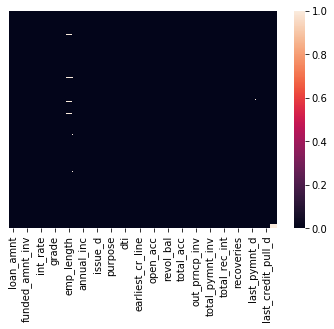

In [12]:
sns.heatmap(df.isnull(),yticklabels=False)

In [15]:
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])
df['last_pymnt_d']=df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0])
df['last_credit_pull_d']=df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0])
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mean())

In [17]:
df['revol_util']=df['revol_util'].fillna(df['revol_util'].mode()[0])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  float64
 1   funded_amnt              39717 non-null  float64
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               39717 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [20]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

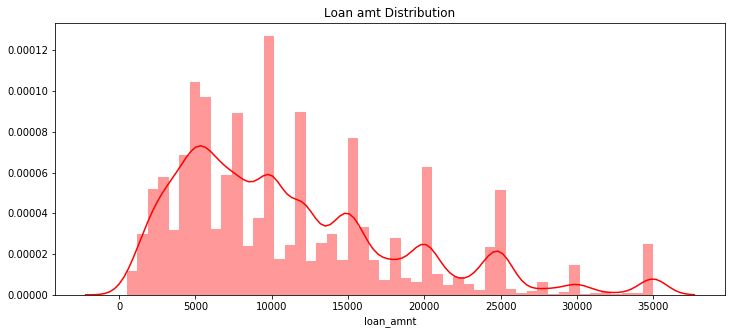

In [21]:
pl.figure(figsize=(12,5))
pl.title("Loan amt Distribution")
ax = sns.distplot(df["loan_amnt"], color = 'r')

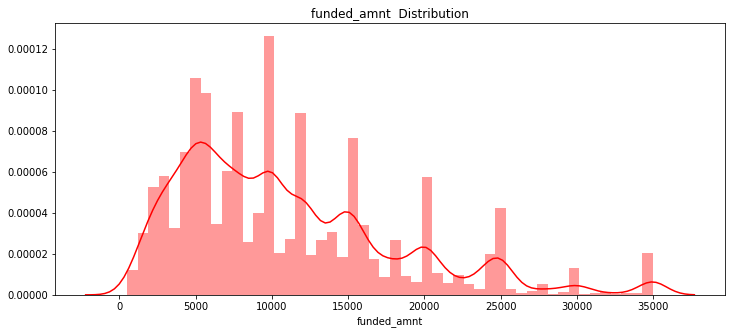

In [23]:
pl.figure(figsize=(12,5))
pl.title("funded_amnt  Distribution")
ax = sns.distplot(df["funded_amnt"], color = 'r')

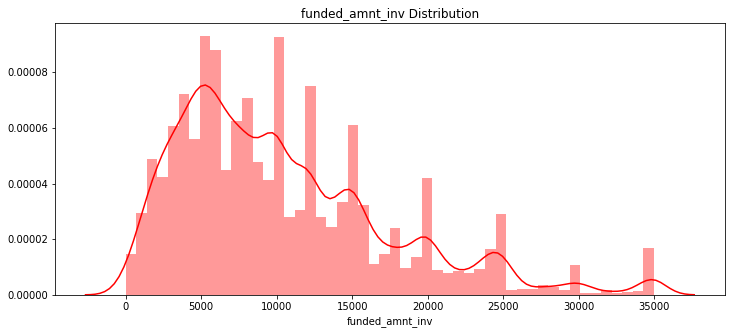

In [24]:
pl.figure(figsize=(12,5))
pl.title("funded_amnt_inv Distribution")
ax = sns.distplot(df["funded_amnt_inv"], color = 'r')

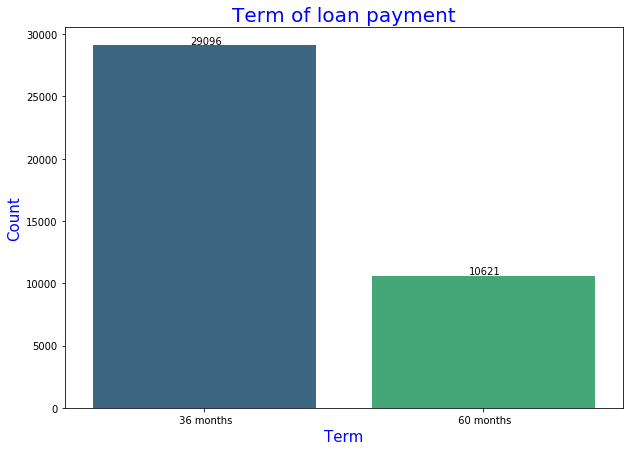

In [25]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=df.term,label="Count",palette="viridis")
plt.xlabel('Term',fontsize = 15,color='blue')
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('Term of loan payment',fontsize = 20,color='blue')
#total = len(data['year'])
# how to show counts:
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

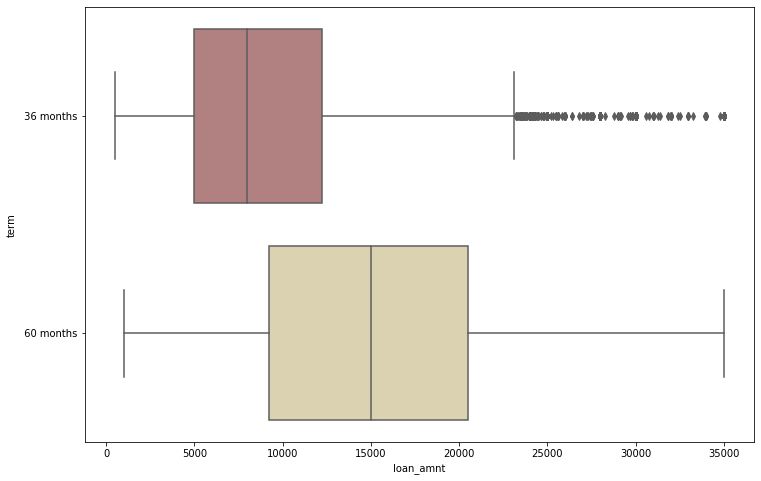

In [26]:
sns.boxplot(y="term", x="loan_amnt", data=df, palette = 'pink')

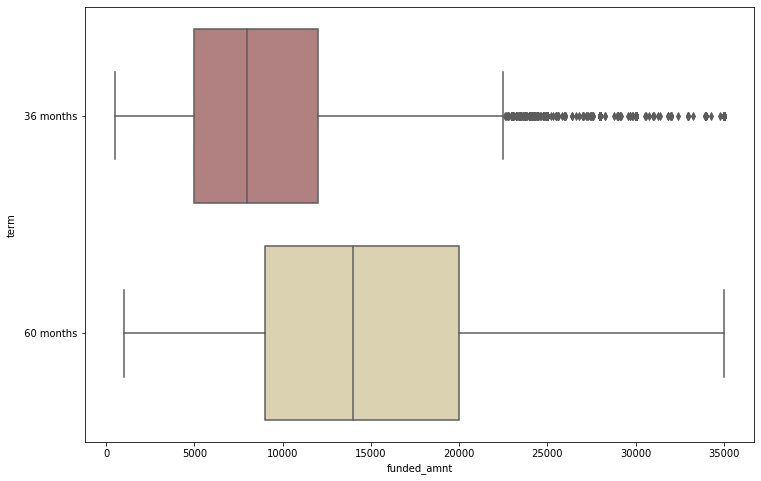

In [27]:
sns.boxplot(y="term", x="funded_amnt", data=df, palette = 'pink')

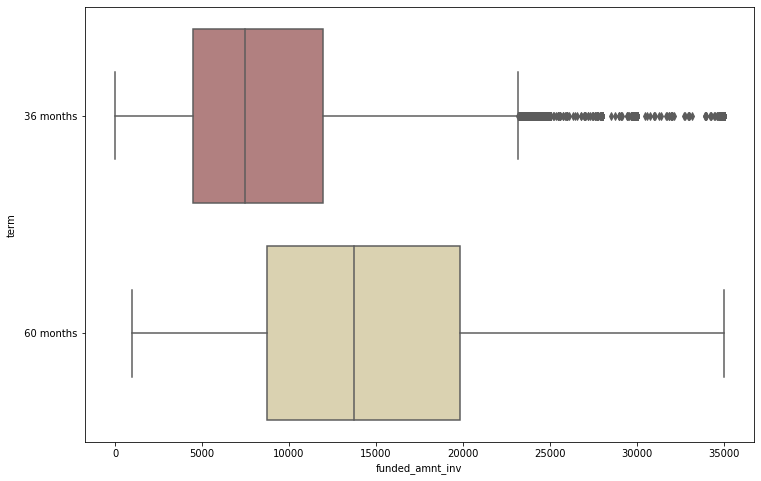

In [28]:
sns.boxplot(y="term", x="funded_amnt_inv", data=df, palette = 'pink')

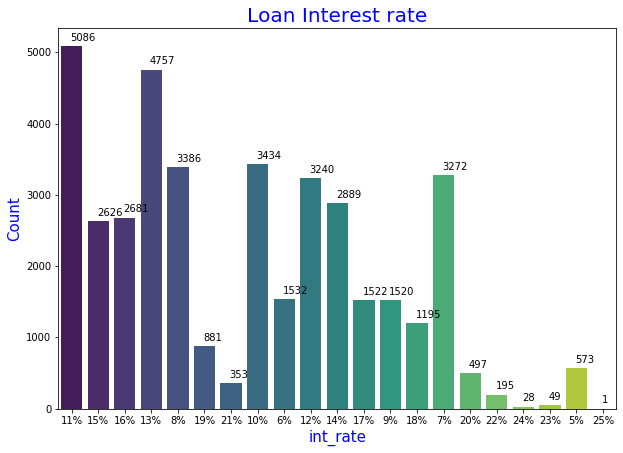

In [35]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=df.int_rate,label="Count",palette="viridis")
plt.xlabel('int_rate',fontsize = 15,color='blue')
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('Loan Interest rate',fontsize = 20,color='blue')
#total = len(data['year'])
# how to show counts:
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

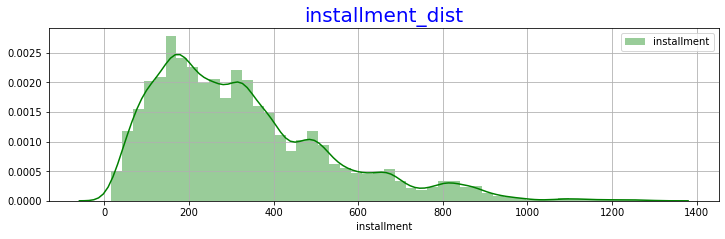

In [41]:
f,ax = plt.subplots(figsize = (12,7))
plt.subplot(2,1,1) # ikiye birlik düzlemde ilk grafik
sns.distplot(df.installment,color="green",label="installment");
plt.title("installment_dist",fontsize = 20,color='blue')
plt.legend()
plt.grid()

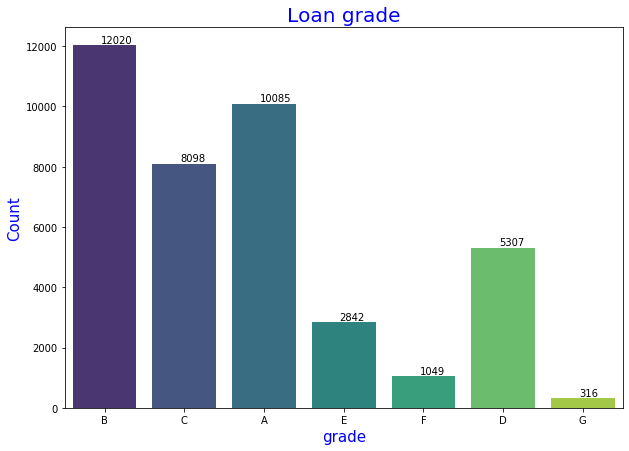

In [42]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=df.grade,label="Count",palette="viridis")
plt.xlabel('grade',fontsize = 15,color='blue')
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('Loan grade',fontsize = 20,color='blue')
#total = len(data['year'])
# how to show counts:
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

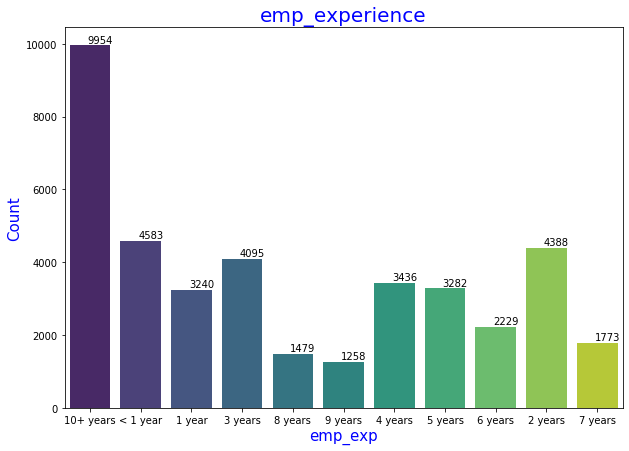

In [43]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=df.emp_length,label="Count",palette="viridis")
plt.xlabel('emp_exp',fontsize = 15,color='blue')
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('emp_experience',fontsize = 20,color='blue')
#total = len(data['year'])
# how to show counts:
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

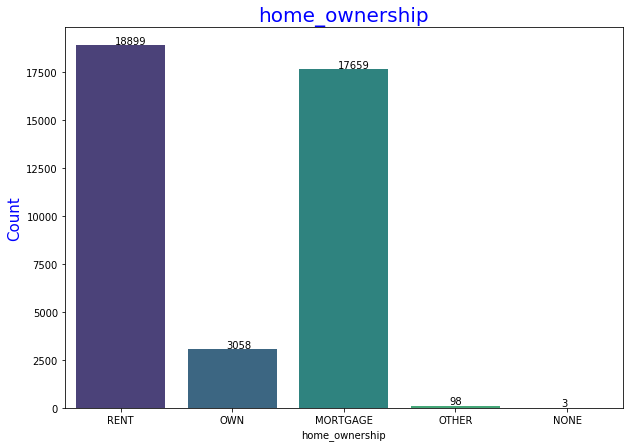

In [44]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=df.home_ownership,label="Count",palette="viridis")
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('home_ownership',fontsize = 20,color='blue')
#total = len(data['year'])
# how to show counts:
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

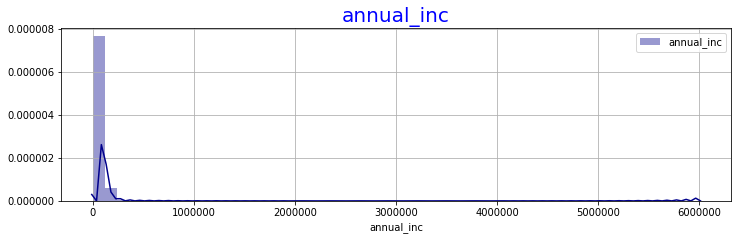

In [45]:
f,ax = plt.subplots(figsize = (12,7))
plt.subplot(2,1,1) # ikiye birlik düzlemde ilk grafik
sns.distplot(df.annual_inc,color="darkblue",label="annual_inc");
plt.title("annual_inc",fontsize = 20,color='blue')
plt.legend()
plt.grid()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  float64
 1   funded_amnt              39717 non-null  float64
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               39717 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

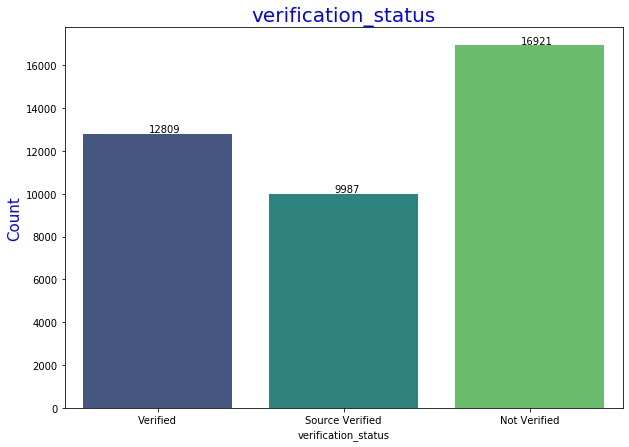

In [47]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=df.verification_status,label="Count",palette="viridis")
plt.ylabel('Count',fontsize = 15,color='blue')
plt.title('verification_status',fontsize = 20,color='blue')
#total = len(data['year'])
# how to show counts:
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

Text(0.5, 1.0, 'loan_amnt provided per type term over time')

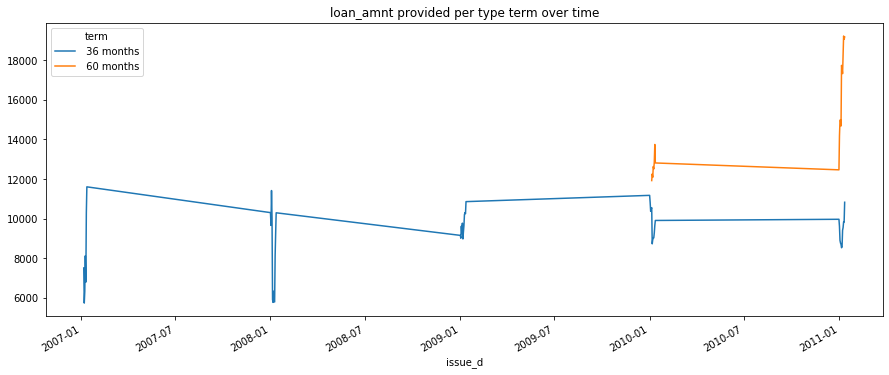

In [51]:
fig,ax = plt.subplots(figsize=(15,6))
df.groupby(['issue_d','term']).mean()['loan_amnt'].unstack().plot(ax=ax)
plt.title('loan_amnt provided per type term over time')